### 食べログの評価とgooglemapの評価の相関性

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
data = pd.read_csv('gt_ratings.csv') # お店の名前はセンシティブなので事前に削除しました

In [94]:
data.head()

,g_id,g_rating,g_votes,genre,t_idx,t_rating,t_votes
0,33,3.9,262,中華料理,152,3.54,156
1,7,3.6,192,和食,117,3.08,41
2,36,3.9,78,中華料理,191,3.24,26
3,48,3.8,98,カレー,109,3.15,46
4,2,3.8,48,和食,53,3.34,19


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   g_id      68 non-null     int64  
 1   g_rating  68 non-null     float64
 2   g_votes   68 non-null     int64  
 3   genre     68 non-null     object 
 4   t_idx     68 non-null     int64  
 5   t_rating  68 non-null     object 
 6   t_votes   68 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 3.8+ KB


t_ratingがobject typeになっているので、float typeに変換

In [96]:
data['t_rating'] = pd.to_numeric(data['t_rating'], errors='coerce')

rating,votes,genreだけにしぼります。

In [97]:
cols = ['g_rating','g_votes','t_rating', 't_votes','genre']
ratings = data[cols]

ratings

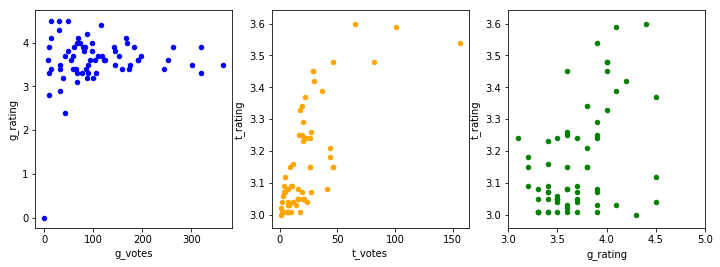

In [98]:
fig, axes = plt.subplots(ncols=3, figsize=(12,4))
ratings.plot(kind='scatter', x='g_votes', y='g_rating', c='blue',ax=axes[0])
ratings.plot(kind='scatter', x='t_votes', y='t_rating', c='orange',ax=axes[1])
ratings.plot(kind='scatter', x='g_rating', y='t_rating', c='green',ax=axes[2],xlim=(3,5))

- googleマップは口コミ数と評価の相関は弱い
    - googleマップの評価は、おそらく単純平均
- 食べログは口コミ数と評価の相関が非常に強い
    - 食べログの評価は単純平均ではない。公式HPではhttps://tabelog.com/help/score/
        >ユーザー影響度を加味している
        >評価が集まらないと点数が上がらない
      と述べられており、評価とレビューの数に正の相関があるのは妥当である。
      
### googlemapと食べログの評価の相関関係

食べログ評価数が20以上のデータを対象に、評価の相関関係をプロットし、相関係数を求める。

In [100]:
ratings_over20 = ratings[ratings['t_votes'] >= 20]

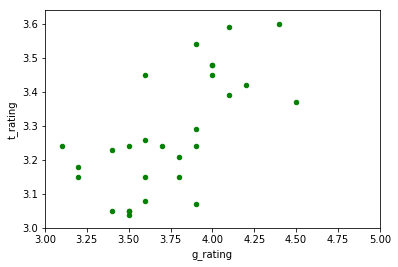

In [101]:
ratings_over20.plot(kind='scatter', x='g_rating', y='t_rating', c='green',xlim=(3,5))

In [102]:
ratings_over20.corr()

,g_rating,g_votes,t_rating,t_votes
g_rating,1.000000,0.186639,0.409486,0.219349
g_votes,0.186639,1.000000,-0.278371,0.144715
t_rating,0.409486,-0.278371,1.000000,0.591668
t_votes,0.219349,0.144715,0.591668,1.000000


googlemapの評価と食べログの評価の相関係数Rは

\\(R=0.41\\)

となり、正の強い相関があることがわかります。

### 食べログ評価が3.4〜3.6の時の不偏分散σと平均値±3σ

In [103]:
t_rating_range = ratings_over20[(ratings_over20['t_rating']>= 3.4) & (ratings_over20['t_rating'] <=3.6)]
mean = t_rating_range['g_rating'].mean()
g_std =t_rating_range['g_rating'].std(ddof=1)
print('{} < g_rating < {}'.format(mean-3*g_std, mean+3*g_std))

3.3306349251705867 < g_rating < 4.7193650748294145


### 結論

- 食べログ評価とgooglemapの評価には正の相関がある
- 食べログ評価が3.4〜3.6の時、googlemapの評価はおおよそ3.3〜4.7の範囲に収まる

### Future work
- ジャンル毎に評価の平均値、分散を求め、傾向を見る
- 食べログの情報から、機械学習を用いてgooglemapの評価を予測する